# К-средних

In [1]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
data, y = make_blobs(200, cluster_std=2.0, centers=5, random_state=10)

# Function to update the plot based on the selected number of iterations
def update_plot(max_iter, n_clusters=5, random_state=11):
    plt.figure(figsize=(8, 8))
    
    # Fit KMeans object to data with the selected number of iterations
    kmeans = KMeans(n_clusters=n_clusters, init='random', max_iter=max_iter, n_init=1, random_state=random_state)
    kmeans.fit(data)
    
    # Predict cluster labels for data
    labels_kmeans = kmeans.predict(data)
    
    # Plot data points with cluster labels
    plt.scatter(data[:, 0], data[:, 1], c=labels_kmeans, alpha=0.5)
    
    # Plot cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', marker='x', s=100)
    
    # Plot the path of cluster centers from max_iter=1 to the current max_iter
    centers_path = []
    for i in range(1, max_iter+1):
        kmeans_path = KMeans(n_clusters=n_clusters, init='random', max_iter=i, n_init=1, random_state=random_state)
        kmeans_path.fit(data)
        centers_path.append(kmeans_path.cluster_centers_)
    
    centers_path = np.array(centers_path)
    for i in range(n_clusters):
        plt.plot(centers_path[:, i, 0], centers_path[:, i, 1], 'r-', alpha=0.3)
    
    plt.title(f'KMeans Clustering (max_iter={max_iter}, n_clusters={n_clusters})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Create an interactive plot using ipywidgets.interact
widgets.interact(
    update_plot, 
    max_iter=widgets.IntSlider(min=1, max=20, value=1, description='Max Iter'),
    random_state=widgets.IntSlider(min=1, max=30, value=1, description='RS'),
    n_clusters=widgets.IntSlider(min=2, max=7, value=1, description='Clusters'));

interactive(children=(IntSlider(value=1, description='Max Iter', max=20, min=1), IntSlider(value=2, descriptio…

# Иерархическая

In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Generate random data
data, y = make_blobs(200, cluster_std=2.0, centers=5, random_state=10)

aggl = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = aggl.fit_predict(data)

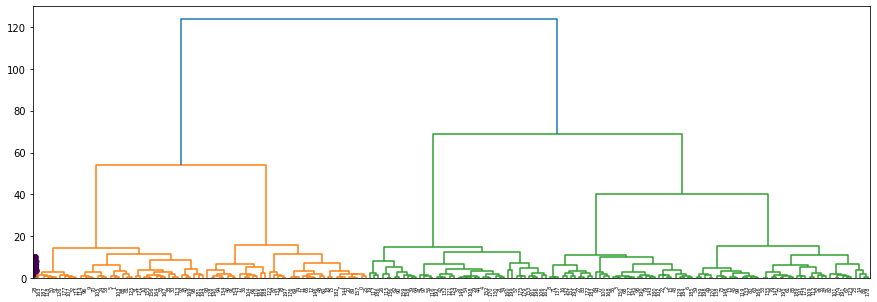

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage matrix using Ward's method
Z = linkage(data, method='ward')

# Plot dendrogram
plt.figure(figsize=(15,5))
dendr = dendrogram(Z)

# Cut dendrogram at height 30 to obtain clusters
from scipy.cluster.hierarchy import fcluster

labels_hierarchical = fcluster(Z, 100, criterion='distance')

# Visualize results
plt.scatter(data[:, 0], data[:, 1], c=labels_hierarchical);

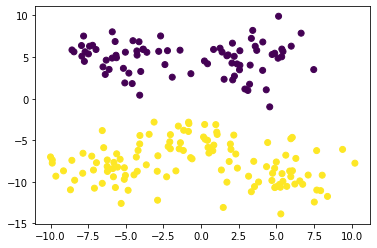

In [5]:
# Cut dendrogram at height 30 to obtain clusters
from scipy.cluster.hierarchy import fcluster

labels_hierarchical = fcluster(Z, 100, criterion='distance')

# Visualize results
plt.scatter(data[:, 0], data[:, 1], c=labels_hierarchical);

In [ ]:
adjusted_rand_score(df['is_red'].iloc[::20], labels_hierarchical)

In [8]:
import ipywidgets as widgets
from IPython.display import display
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
data, y = make_blobs(200, cluster_std=2.0, centers=5, random_state=10)

# Compute linkage matrix using Ward's method
Z = linkage(data, method='ward')

# Function to update the plot based on the selected hierarchy level (t)
def update_plot(t):
    plt.figure(figsize=(16, 10))
    
    # Cut dendrogram at height t to obtain clusters
    labels_hierarchical = fcluster(Z, t=t, criterion='distance')
    
    # Get the number of clusters
    n_clusters = len(set(labels_hierarchical))
    
    # Visualize results
    plt.subplot(1, 2, 1)
    plt.scatter(data[:, 0], data[:, 1], c=labels_hierarchical, cmap='viridis')
    plt.title(f'Scatter Plot (t={t:.2f}, n_clusters={n_clusters})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    # Plot dendrogram
    plt.subplot(1, 2, 2)
    dendrogram(Z, color_threshold=t)
    plt.title('Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    
    plt.tight_layout()
    plt.show()

# Create an interactive plot using ipywidgets.interact
widgets.interact(
    update_plot, 
    t=widgets.FloatSlider(min=0, max=200, step=1, value=100, description='t'));

interactive(children=(FloatSlider(value=100.0, description='t', max=200.0, step=1.0), Output()), _dom_classes=…

# DBSCAN

also nice visualization with iterations
`https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/`

In [9]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
data, y = make_blobs(200, cluster_std=2.0, centers=5, random_state=10)

# Function to update the plot based on the selected eps and min_samples
def update_plot(eps, min_samples):
    plt.figure(figsize=(8, 8))
    
    # Fit DBSCAN object to data with the selected eps and min_samples
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(data)
    
    # Get cluster labels for data
    labels_dbscan = dbscan.labels_
    
    # Get the number of clusters (excluding noise points)
    n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
    
    # Plot data points with cluster labels
    unique_labels = set(labels_dbscan)
#     colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    colors = plt.cm.Paired(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = 'k'  # Black color for noise points
        
        class_member_mask = (labels_dbscan == k)
        xy = data[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='.', alpha=0.75, s=150)
    
    plt.title(f'DBSCAN Clustering (eps={eps:.2f}, min_samples={min_samples}, n_clusters={n_clusters})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Create an interactive plot using ipywidgets.interact
widgets.interact(
    update_plot, 
    eps=widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description='Eps'),
    min_samples=widgets.IntSlider(min=2, max=10, value=5, description='Min Samples'));

interactive(children=(FloatSlider(value=0.5, description='Eps', max=5.0, min=0.1), IntSlider(value=5, descript…